In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

path = '../../shared_data/round4/'
days = [1, 2, 3]

activity = [pd.read_csv(path + f'prices_round_4_day_{d}.csv', sep=';') for d in days]
activity = pd.concat(activity)
activity.set_index(['product', 'day', 'timestamp'], inplace=True)
activity

bid_price_1  bid_volume_1  bid_price_2  \
product        day timestamp                                           
COCONUT        1   0               9999.0         200.0          NaN   
COCONUT_COUPON 1   0                637.0          39.0          NaN   
COCONUT        1   100             9999.0         104.0       9998.0   
COCONUT_COUPON 1   100              637.0          33.0          NaN   
COCONUT        1   200             9998.0         133.0       9997.0   
...                                   ...           ...          ...   
COCONUT_COUPON 3   999700           575.0          40.0          NaN   
                   999800           575.0          30.0          NaN   
COCONUT        3   999800          9883.0         127.0       9882.0   
COCONUT_COUPON 3   999900           575.0          43.0          NaN   
COCONUT        3   999900          9882.0         137.0       9881.0   

                              bid_volume_2  bid_price_3  bid_volume_3  \
product        day timestamp                                            
COCONUT        1   0                   NaN          NaN           NaN   
COCONUT_COUPON 1   0                   NaN          NaN           NaN   
COCONUT        1   100                44.0          NaN           NaN   
COCONUT_COUPON 1   100                 NaN          NaN           NaN   
COCONUT        1   200                62.0          NaN           NaN   
...                                    ...          ...           ...   
COCONUT_COUPON 3   999700              NaN          NaN           NaN   
                   999800              NaN          NaN           NaN   
COCONUT        3   999800             46.0          NaN           NaN   
COCONUT_COUPON 3   999900              NaN          NaN           NaN   
COCONUT        3   999900             69.0          NaN           NaN   

                              ask_price_1  ask_volume_1  ask_price_2  \
product        day timestamp                                           
COCONUT        1   0                10001           200          NaN   
COCONUT_COUPON 1   0                  638            39          NaN   
COCONUT        1   100              10000           104      10001.0   
COCONUT_COUPON 1   100                638            33          NaN   
COCONUT        1   200               9999           133      10000.0   
...                                   ...           ...          ...   
COCONUT_COUPON 3   999700             576            40          NaN   
                   999800             576            44          NaN   
COCONUT        3   999800            9885           164          NaN   
COCONUT_COUPON 3   999900             576            43          NaN   
COCONUT        3   999900            9883           131       9884.0   

                              ask_volume_2  ask_price_3  ask_volume_3  \
product        day timestamp                                            
COCONUT        1   0                   NaN          NaN           NaN   
COCONUT_COUPON 1   0                   NaN          NaN           NaN   
COCONUT        1   100                44.0          NaN           NaN   
COCONUT_COUPON 1   100                 NaN          NaN           NaN   
COCONUT        1   200                62.0          NaN           NaN   
...                                    ...          ...           ...   
COCONUT_COUPON 3   999700              NaN          NaN           NaN   
                   999800              NaN          NaN           NaN   
COCONUT        3   999800              NaN          NaN           NaN   
COCONUT_COUPON 3   999900              NaN          NaN           NaN   
COCONUT        3   999900             69.0          NaN           NaN   

                              mid_price  profit_and_loss  
product        day timestamp                              
COCONUT        1   0            10000.0              0.0  
COCONUT_COUPON 1   0              637.5              0.0  
COCONUT        1   1

In [2]:
trade = pd.concat([pd.read_csv(path + f'trades_round_4_day_{d}_nn.csv', sep=';').assign(day=d) for d in days])
trade.set_index(['symbol', 'day', 'timestamp'], inplace=True)
trade

buyer  seller   currency   price  quantity
symbol         day timestamp                                            
COCONUT_COUPON 1   800          NaN     NaN  SEASHELLS   636.0         5
                   900          NaN     NaN  SEASHELLS   634.0        17
                   1100         NaN     NaN  SEASHELLS   635.0        17
                   1900         NaN     NaN  SEASHELLS   635.0        16
                   2000         NaN     NaN  SEASHELLS   637.0        14
...                             ...     ...        ...     ...       ...
               3   996200       NaN     NaN  SEASHELLS   585.0        14
COCONUT        3   997100       NaN     NaN  SEASHELLS  9885.0         9
                   997200       NaN     NaN  SEASHELLS  9883.0         8
                   998600       NaN     NaN  SEASHELLS  9887.0         5
COCONUT_COUPON 3   999800       NaN     NaN  SEASHELLS   575.0        14

[5122 rows x 5 columns]

In [3]:
products = activity.index.get_level_values(0).unique()
products

Index(['COCONUT', 'COCONUT_COUPON'], dtype='object', name='product')

In [4]:
(activity.loc['COCONUT']['ask_price_1'] - activity.loc['COCONUT']['bid_price_1']).describe()

count    30000.000000
mean         1.472633
std          0.499259
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
dtype: float64

In [5]:
(activity.loc['COCONUT_COUPON']['ask_price_1'] - activity.loc['COCONUT_COUPON']['bid_price_1']).describe()

count    29998.000000
mean         1.089006
std          0.284757
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
dtype: float64

C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\3326762196.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coconut = activity.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\3326762196.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coupons = activity.loc['COCONUT_COUPON', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\3326762196.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coconut = trade.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\3326762196.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coupons = trade.loc['COCONUT_COUPON', d]


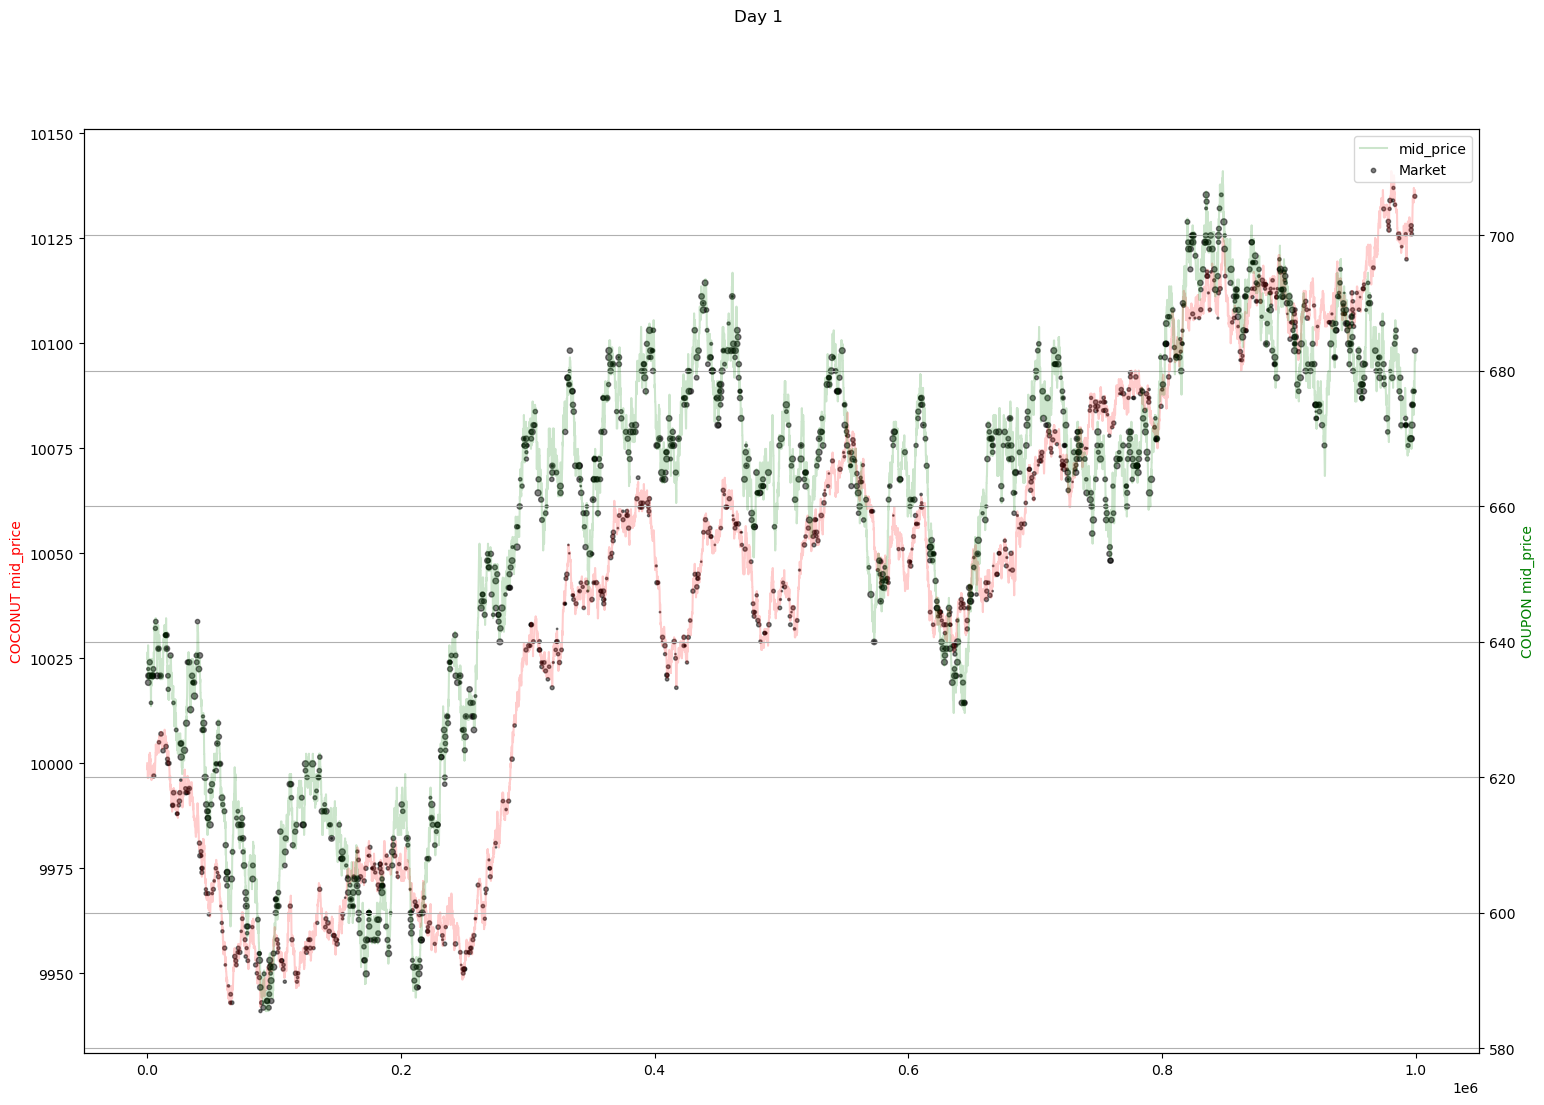

C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\3326762196.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coconut = activity.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\3326762196.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coupons = activity.loc['COCONUT_COUPON', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\3326762196.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coconut = trade.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\3326762196.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coupons = trade.loc['COCONUT_COUPON', d]


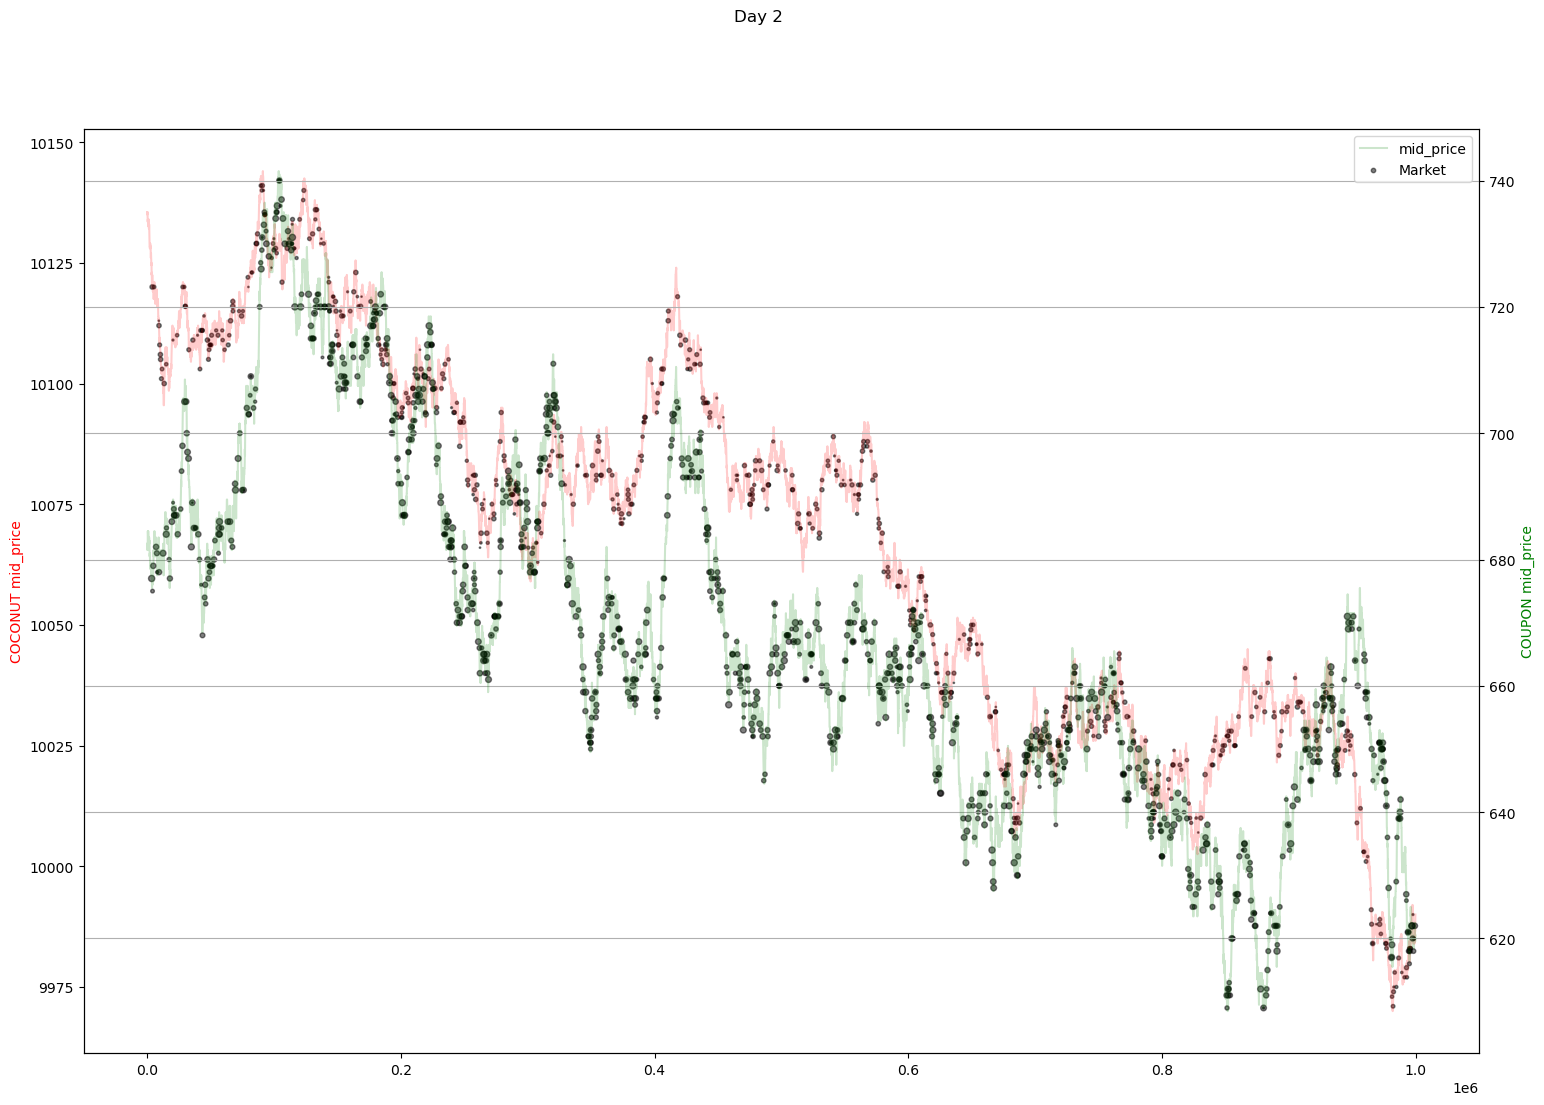

C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\3326762196.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coconut = activity.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\3326762196.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coupons = activity.loc['COCONUT_COUPON', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\3326762196.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coconut = trade.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\3326762196.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coupons = trade.loc['COCONUT_COUPON', d]


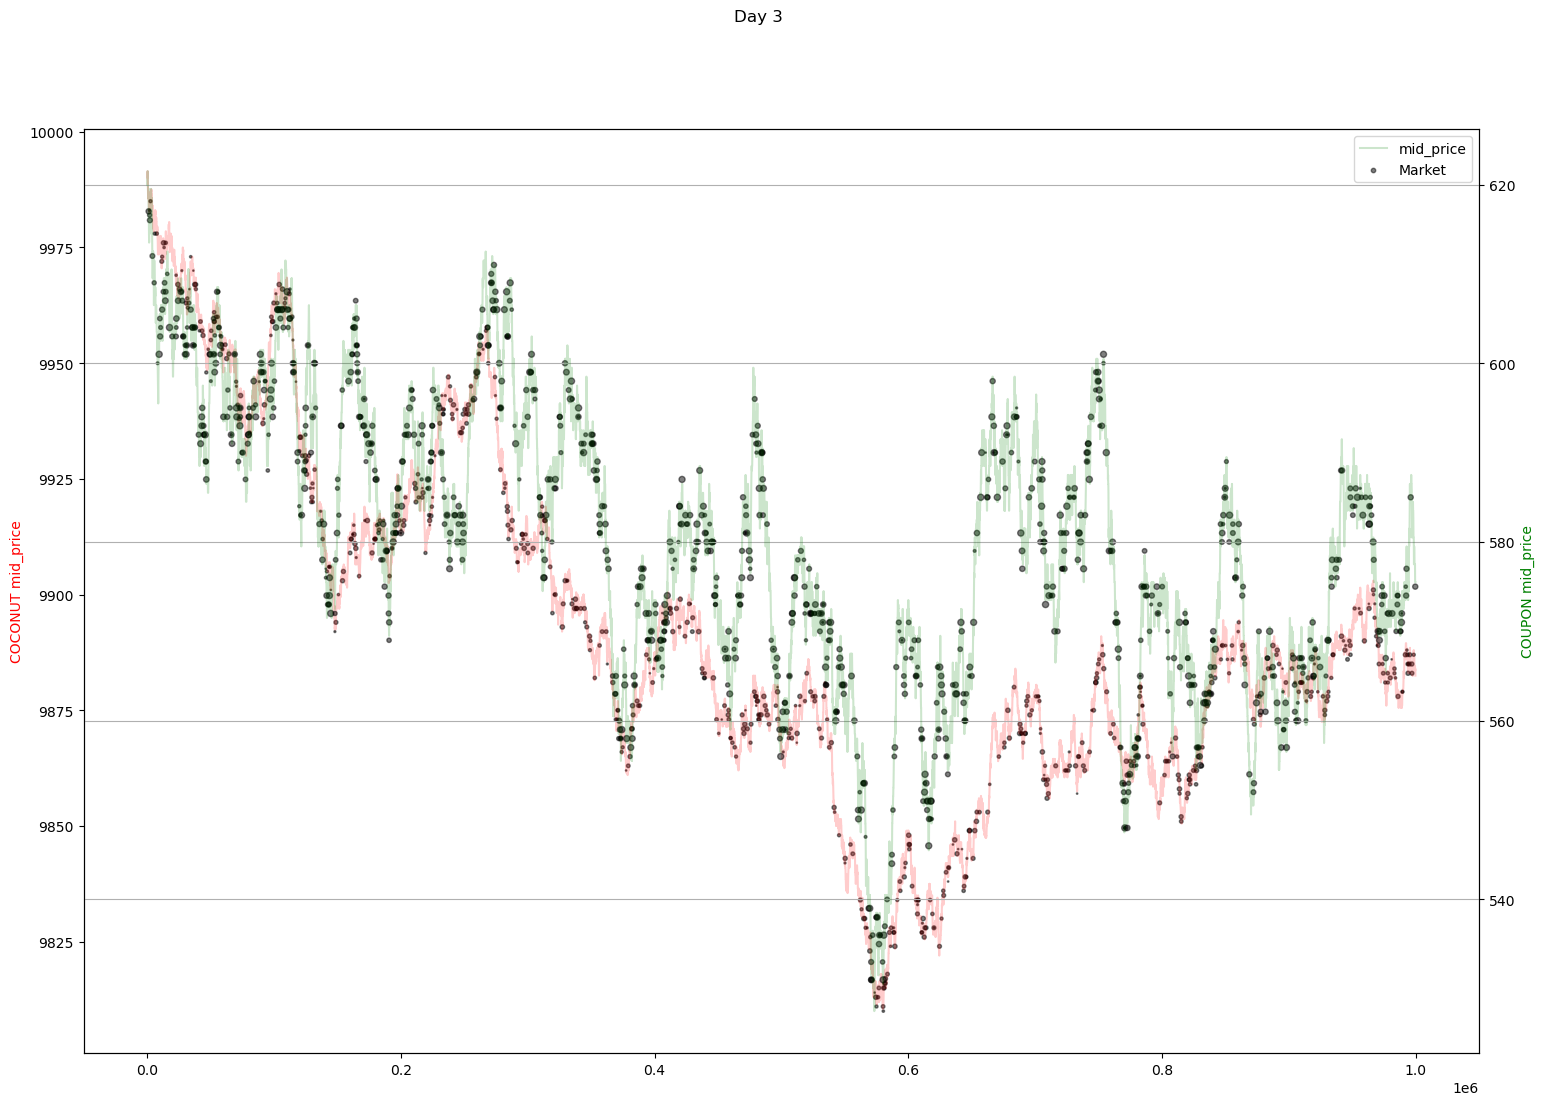

In [6]:
window_size = 20

for d in days:
    activity_coconut = activity.loc['COCONUT', d]
    activity_coupons = activity.loc['COCONUT_COUPON', d]
    market_coconut = trade.loc['COCONUT', d]
    market_coupons = trade.loc['COCONUT_COUPON', d]

    fig, ax1 = plt.subplots(figsize=(18, 12))
    fig.suptitle(f'Day {d}')

    ax2 = ax1.twinx()
    assert isinstance(ax1, plt.Axes)
    assert isinstance(ax2, plt.Axes)
    ax1.plot(activity_coconut['mid_price'], label='mid_price', color='red', alpha=0.2,)
    ax1.scatter(market_coconut.index, market_coconut.price, label='Market', s=1*market_coconut.quantity, color='black', alpha=0.5)
    ax1.set_ylabel('COCONUT mid_price', color='red')
    ax2.plot(activity_coupons['mid_price'], label='mid_price', color='green', alpha=0.2,)
    ax2.scatter(market_coupons.index, market_coupons.price, label='Market', s=1*market_coupons.quantity, color='black', alpha=0.5)
    ax2.set_ylabel('COUPON mid_price', color='green')
    plt.xlabel('Timestamp')
    plt.grid(axis='y')
    plt.legend()    
    plt.show()

In [7]:
data = pd.DataFrame([activity.loc['COCONUT']['mid_price'], activity.loc['COCONUT_COUPON']['mid_price']]).T
data.columns = ['COCONUT', 'COCONUT_COUPON']
data

COCONUT  COCONUT_COUPON
day timestamp                         
1   0          10000.0           637.5
    100         9999.5           637.5
    200         9998.5           637.5
    300         9999.5           638.5
    400         9998.5           637.5
...                ...             ...
3   999500      9883.5           577.5
    999600      9884.5           577.5
    999700      9883.5           575.5
    999800      9884.0           575.5
    999900      9882.5           575.5

[30000 rows x 2 columns]

In [8]:
data.corr()

,COCONUT,COCONUT_COUPON
COCONUT,1.000000,0.957869
COCONUT_COUPON,0.957869,1.000000


# COCONUT - 2 * COCONUT_COUPON

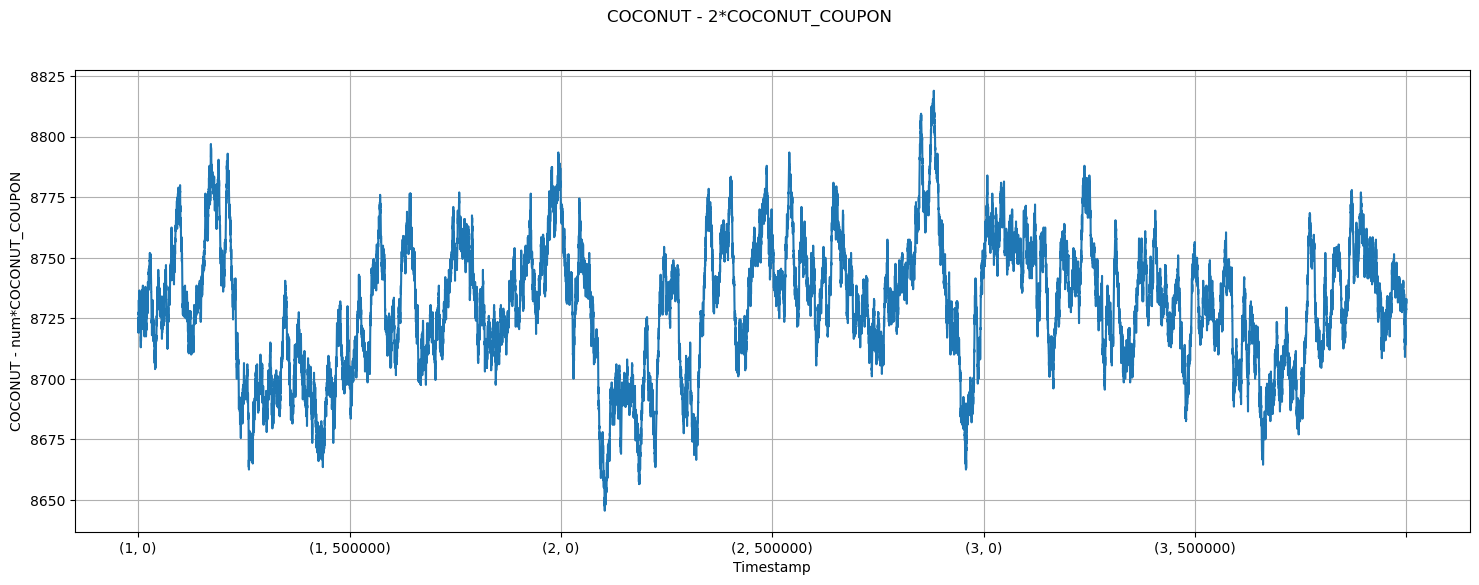

In [13]:
# num = data['COCONUT'].sum()/data['COCONUT_COUPON'].sum()
num = 2
diff = data['COCONUT'] - num*data['COCONUT_COUPON']

fig, ax = plt.subplots(figsize=(18, 6))
fig.suptitle(f'COCONUT - {num}*COCONUT_COUPON')
diff.plot(ax=ax)
plt.xlabel('Timestamp')
plt.ylabel('COCONUT - num*COCONUT_COUPON')
plt.grid()
plt.show()

In [10]:
diff.describe()

count    30000.000000
mean      8729.808117
std         26.768785
min       8645.500000
25%       8711.500000
50%       8731.000000
75%       8749.000000
max       8819.000000
dtype: float64

In [11]:
from statsmodels.tsa.stattools import adfuller
adfuller(diff)

(-6.4396318550533005,
 1.6201962385061108e-08,
 4,
 29995,
 {'1%': -3.43056803166244,
  '5%': -2.861636364100729,
  '10%': -2.566821291670243},
 129937.2088468891)

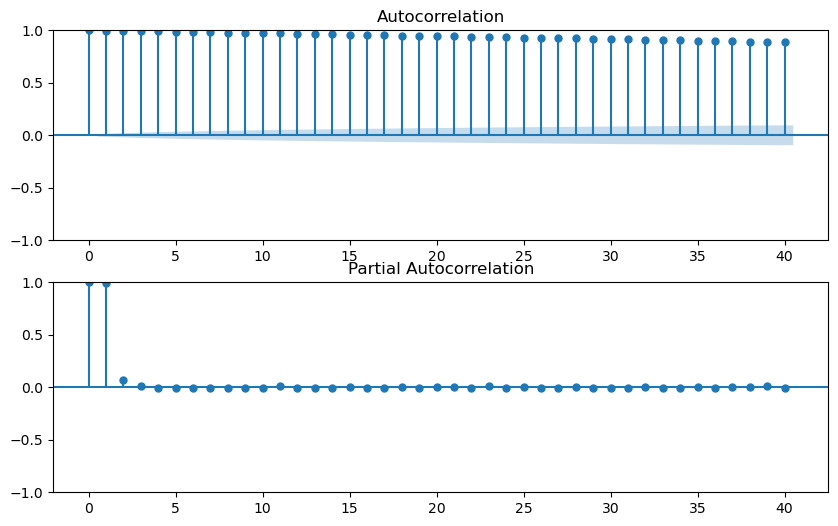

In [15]:
fig, ax = plt.subplots(2, figsize=(10, 6))
plot_acf(diff, lags=40, ax=ax[0])
plot_pacf(diff, lags=40, ax=ax[1])
plt.show()

In [16]:
n_list = [1., 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]

for n in n_list:
    diff = data['COCONUT'] - n*data['COCONUT_COUPON']
    print(f'num={n}, adf={adfuller(diff)[1]}')

num=1.0, adf=0.3539759169846492
num=1.1, adf=0.20049041076884055
num=1.2, adf=0.08490481326966104
num=1.3, adf=0.021674445993231567
num=1.4, adf=0.003648827027015627
num=1.5, adf=0.000356439697028601
num=1.6, adf=2.2482229064089422e-05
num=1.7, adf=1.282098750326743e-06
num=1.8, adf=1.1209880155879557e-07
num=1.9, adf=2.4545164544878708e-08
num=2.0, adf=1.6201962385061108e-08
num=2.1, adf=2.7222599976488827e-08
num=2.2, adf=8.234830326704421e-08
num=2.3, adf=3.2303392454578996e-07
num=2.4, adf=1.314188992969448e-06
num=2.5, adf=4.913835021519298e-06
num=2.6, adf=2.304419202764667e-05
num=2.7, adf=6.293500515524661e-05
num=2.8, adf=0.0001502156537101699
num=2.9, adf=0.000317989873350451


# Options pricing with BSM model

### Black-Scholes European call option pricing model
$$ C = SN(d_1) - Ke^{-rT}N(d_2) $$
where
$$ d_1 = \frac{1}{\sigma\sqrt{T}}\left[\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T\right] $$
$$ d_2 = d_1 - \sigma\sqrt{T} $$
and
$$ N(d) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{d}e^{-\frac{1}{2}x^2}dx $$
is the cumulative distribution function of the standard normal distribution.